In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

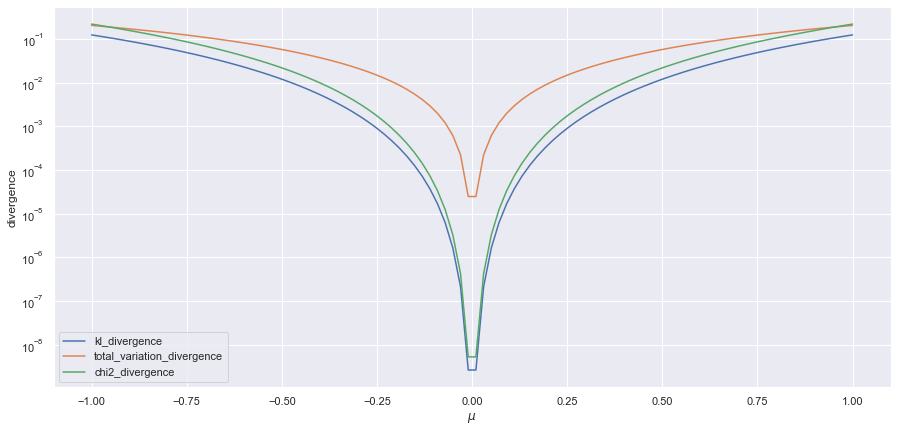

In [23]:
def kl_divergence(p, q, step):
    return step * np.sum(np.where(p != 0, p * np.log(p / q), 0))

def total_variation_divergence(p, q, step):
    return step * 0.5 * np.sum(np.abs(p - q))

def chi2_divergence(p, q, step):
    return step * np.sum((p - q)**2 / q)



lim, step = 10, 0.0001
x = np.arange(-lim, lim, step)
p = scipy.stats.norm.pdf(x, 0, 1)

kl, tv, chi2 = [], [], []
mus = np.linspace(-1, 1, 100)
for mu in mus:
    q1 = scipy.stats.norm.pdf(x, mu, 1)
    q2 = scipy.stats.norm.pdf(x, -mu, 1)
    q = 0.5 * (q1 + q2)
    kl.append(kl_divergence(p, q, step))
    tv.append(total_variation_divergence(p, q, step))
    chi2.append(chi2_divergence(p, q, step))


sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))
plt.yscale("log")
plt.plot(mus, kl, label='kl_divergence')
plt.plot(mus, tv, label='total_variation_divergence')
plt.plot(mus, chi2, label='chi2_divergence')

plt.xlabel("$\mu$")
plt.ylabel("divergence")
plt.legend();

In [24]:
np.mean(np.array(kl)<np.array(chi2))

1.0